## Regression # 2

Question:
Would combining the both end of quality rank improve the model?
Statsmodel and Sklearn capture 39% and 36% of the variability in quality respectively. 

Model_1 RED WINE QUALITY| 3 |4 | 5 | 6| 7| 8
---|---|---|---|---
`Value Count`|10 |53| 681 | 638 |199 |18

                                                to

Model_2 RED WINE QUALITY |4 | 5 | 6| 7
---|---|---|---|---
`Value Count`|63| 681 | 638 |217

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation, metrics, feature_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [3]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [4]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [5]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

RED WINE QUALITY| 3 |4 | 5 | 6| 7| 8
---|---|---|---|---
`Value Count`|10 |53| 681 | 638 |199 |18


In [6]:
df['quality_count']=df.quality.map ({3:4, 4:4, 5:5, 6:6, 7:7, 8:7})

In [7]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,...,density,pH,sulphates,alcohol,quality,quality_count
0,7.4,0.700,0.00,1.9,0.076,11.0,...,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,...,0.99680,3.20,0.68,9.8,5,5
2,7.8,0.760,0.04,2.3,0.092,15.0,...,0.99700,3.26,0.65,9.8,5,5
3,11.2,0.280,0.56,1.9,0.075,17.0,...,0.99800,3.16,0.58,9.8,6,6
4,7.4,0.700,0.00,1.9,0.076,11.0,...,0.99780,3.51,0.56,9.4,5,5
5,7.4,0.660,0.00,1.8,0.075,13.0,...,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,...,0.99651,3.42,0.82,9.5,6,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,...,0.99490,3.45,0.58,10.5,5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,...,0.99512,3.52,0.76,11.2,6,6


In [8]:
df.quality_count.value_counts()

5    681
6    638
7    217
4     63
Name: quality_count, dtype: int64

RED WINE QUALITY|4 | 5 | 6| 7
---|---|---|---|---
`Value Count`|63| 681 | 638 |217

In [9]:
df.drop(['quality'], axis = 1, inplace = True)

In [10]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_count
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119453550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11be66850>]], dtype=object)

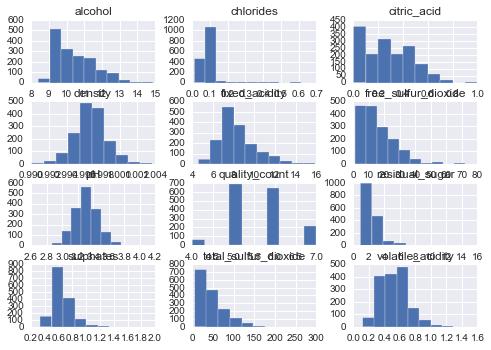

In [11]:
df.hist()

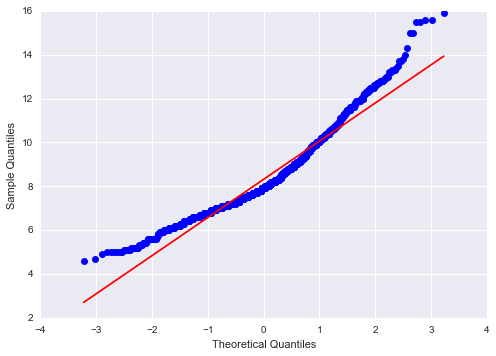

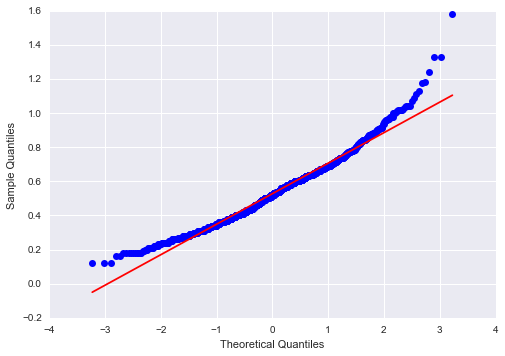

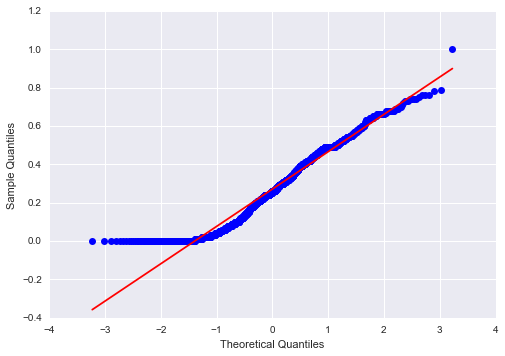

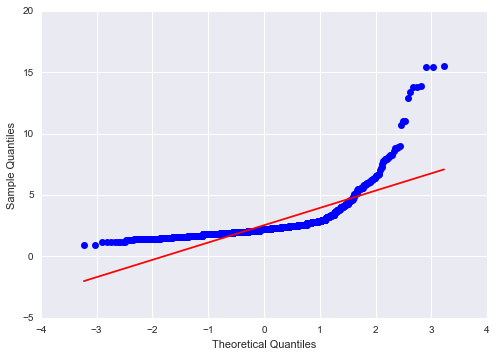

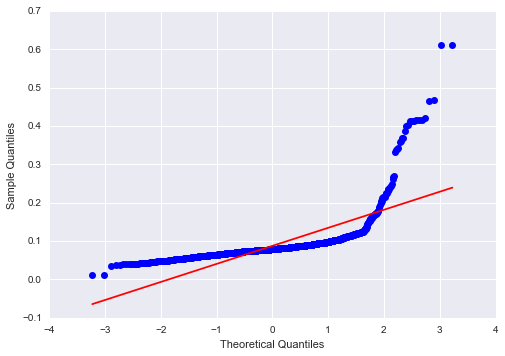

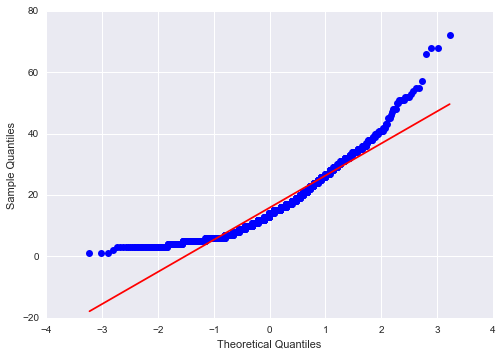

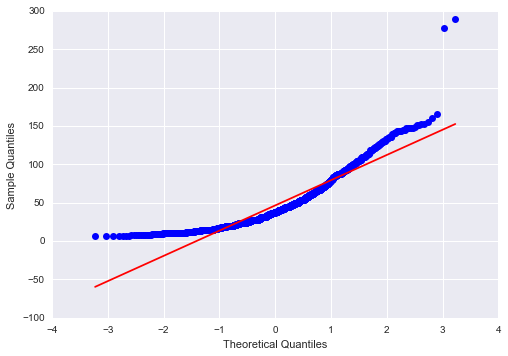

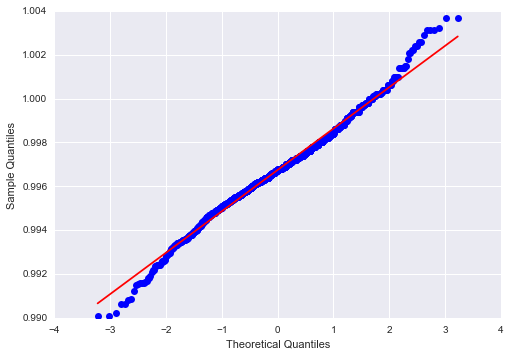

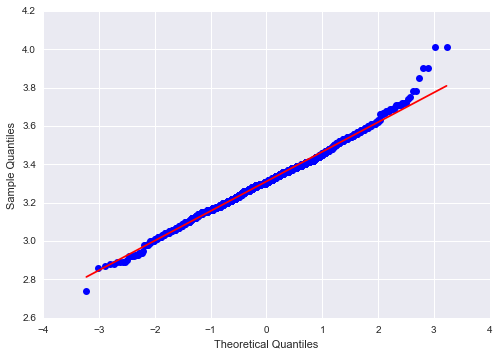

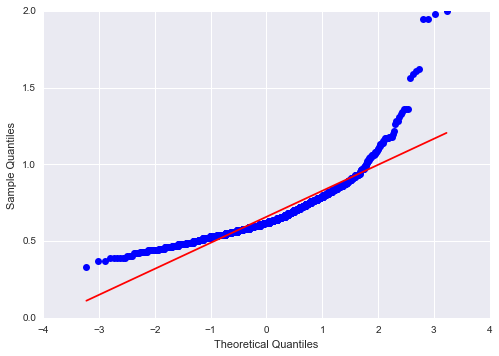

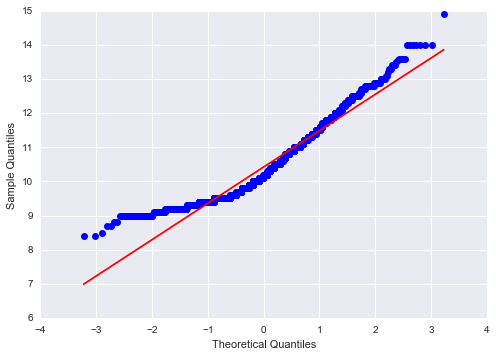

In [12]:
sm.qqplot(df.fixed_acidity, line = 's')
sm.qqplot(df.volatile_acidity, line = 's')
sm.qqplot(df.citric_acid, line = 's')
sm.qqplot(df.residual_sugar, line = 's')
sm.qqplot(df.chlorides, line = 's')
sm.qqplot(df.free_sulfur_dioxide, line = 's')
sm.qqplot(df.total_sulfur_dioxide, line ='s')
sm.qqplot(df.density, line ='s')
sm.qqplot(df.pH, line = 's')
sm.qqplot(df.sulphates, line = 's')
sm.qqplot(df.alcohol, line = 's')

pass

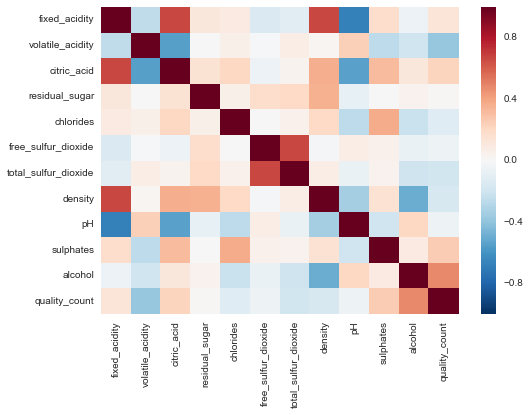

In [13]:
sns.heatmap(df.corr())

In [14]:
df.corr().quality_count.sort_values(ascending = False).head()

quality_count    1.000000
alcohol          0.476713
sulphates        0.251999
citric_acid      0.226040
fixed_acidity    0.129255
Name: quality_count, dtype: float64

#2 CORR QUALITY|alcohol | sulphates |citric_acid| fixed_acidity
---|---|---|---|---
`Value `|0.476713| 0.251999 | 0.226040 |0.129255

#1 CORR. QUALITY|alcohol |sulphates | citric_acid| fixed_acidity
---|---|---|---|---
`Value `|0.476166| 0.251397 | 0.226373 |0.124052

In [15]:
X = df.drop('quality_count', axis= 1)

In [16]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [17]:
y = df.quality_count

In [18]:
y

0       5
1       5
2       5
3       6
4       5
5       5
       ..
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality_count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [20]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

959
640
959
640


## Statsmodel

In [21]:
X_train_constant = sm.add_constant(X_train)
X_train_model = sm.OLS(y_train, X_train_constant).fit()

X_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_count   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     55.07
Date:                Tue, 15 Nov 2016   Prob (F-statistic):           6.55e-94
Time:                        14:34:39   Log-Likelihood:                -889.28
No. Observations:                 959   AIC:                             1803.
Df Residuals:                     947   BIC:                             1861.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   23.2177     25.508      0.910      0.363       -26.840    73.276
fixed_acidity            0.0090      0.032      0.285      0.776        -0.053     0.071
volatile_acidity        -1.1132      0.143     -7.758      0.000        -1.395    -0.832
citric_acid             -0.0296      0.183     -0.162      0.871        -0.388     0.329
residual_sugar           0.0332      0.017      1.919      0.055        -0.001     0.067
chlorides               -2.0195      0.473     -4.272      0.000        -2.947    -1.092
free_sulfur_dioxide     -0.0001      0.003     -0.047      0.963        -0.005     0.005
total_sulfur_dioxide    -0.0030      0.001     -3.485      0.001        -0.005    -0.001
density                -18.9871     26.034     -0.729      0.466       -70.078    32.104
pH                      -0.3321      0.233     -1.423      0.155        -0.790     0.126
sulphates                0.8826      0.135      6.559      0.000         0.619     1.147
alcohol                  0.2545      0.032      8.012      0.000         0.192     0.317
==============================================================================
Omnibus:                        3.932   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.877
Skew:                          -0.155   Prob(JB):                        0.144
Kurtosis:                       3.019   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

variables that are statistical significant:
1. volatile_acidity
2. chlorides
3. total_sulfur_dioxide
5. sulphates
6. alcohol

pH was significant in model #1 but not in model #3

## Sklearn model

In [22]:
# these are the coefficients of regression line 
X_train = df[ [ 'volatile_acidity', 'chlorides','total_sulfur_dioxide', 'sulphates', 'alcohol'] ]
y_train = df.quality_count

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print model.intercept_
print model.coef_

3.13909925581
[-1.06692808 -1.53102989 -0.00243026  0.86521073  0.26215836]


In [23]:
# Variable and p value
zip(X_train.columns.values, feature_selection.f_regression(X_train, y_train)[1])

[('volatile_acidity', 1.3416766815521087e-58),
 ('chlorides', 6.2558758965481022e-07),
 ('total_sulfur_dioxide', 3.3583656734265745e-15),
 ('sulphates', 1.3886283367921233e-24),
 ('alcohol', 1.651115203571596e-91)]

Coefficients that are significant > 5% (95% CI):
ALL OF THEM

In [24]:
model.score(X_train, y_train)

0.3519487821006585

Sklearn model capture 35% of the variability in quality and Statsmodel capture 39%

Removing pH and running Statsmodel

In [28]:
X_train = df[['volatile_acidity', 'chlorides','sulphates', 'alcohol']]
y_train = df.quality_count

X_train_constant = sm.add_constant(X_train)
X_train_model = sm.OLS(y_train, X_train_constant).fit()

X_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_count   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 15 Nov 2016   Prob (F-statistic):          6.36e-143
Time:                        14:40:24   Log-Likelihood:                -1503.5
No. Observations:                1599   AIC:                             3017.
Df Residuals:                    1594   BIC:                             3044.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                2.8990      0.188     15.408      0.000         2.530     3.268
volatile_acidity    -1.0938      0.092    -11.863      0.000        -1.275    -0.913
chlorides           -1.4682      0.373     -3.937      0.000        -2.200    -0.737
sulphates            0.8218      0.105      7.849      0.000         0.616     1.027
alcohol              0.2779      0.015     18.063      0.000         0.248     0.308
==============================================================================
Omnibus:                        4.584   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.557
Skew:                          -0.104   Prob(JB):                        0.102
Kurtosis:                       3.158   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model_four = smf.ols(formula = 'quality_count ~ volatile_acidity + chlorides + sulphates + alcohol', data = df).fit()

model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_count   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 15 Nov 2016   Prob (F-statistic):          6.36e-143
Time:                        14:40:38   Log-Likelihood:                -1503.5
No. Observations:                1599   AIC:                             3017.
Df Residuals:                    1594   BIC:                             3044.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            2.8990      0.188     15.408      0.000         2.530     3.268
volatile_acidity    -1.0938      0.092    -11.863      0.000        -1.275    -0.913
chlorides           -1.4682      0.373     -3.937      0.000        -2.200    -0.737
sulphates            0.8218      0.105      7.849      0.000         0.616     1.027
alcohol              0.2779      0.015     18.063      0.000         0.248     0.308
==============================================================================
Omnibus:                        4.584   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.557
Skew:                          -0.104   Prob(JB):                        0.102
Kurtosis:                       3.158   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

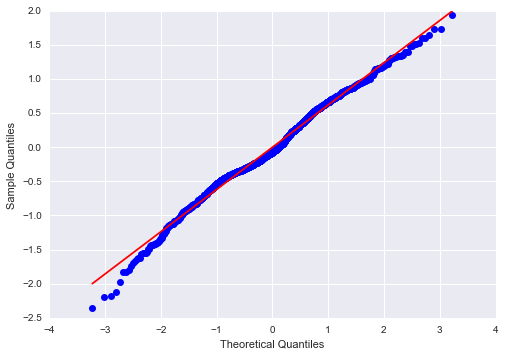

In [27]:
sm.qqplot(model_four.resid, line = 's')

pass

## Summary

 Back to question: Would combining the both end of quality rank improve the model? 
 No. The result are similar. Possibly due to colinearity among the features. 
 
 Model 1 = Using all variables, Statsmodel and Sklearn capture 39% and 36% of the variability in quality respectively. Variables that are statistically significant are:  
 1.volatile_acidity, 2. chlorides, 3. total_sulfur_dioxide, 4. pH, 5. sulphates, 6. alcohol
 
 Model 3 = Statsmodel and Sklearn capture 39% and 35% of the variability in quality respectively. Same variable as model are statatistically significant, except pH. 
 

Summary R2| Stastsmodel |Sklearn 
---|---|---|---|---
`Model 1 - Multiple Linear Regression `|39%|36%
`Model 2 - log pH`|39%|35%
`Model 3 - Multiple Linear Regression `|39%|35%

## Next Steps

- Model using Decision Trees
- PCA
to see how the score compare. 